# Text-to-SQL - Thiago Pádua

## Introdução
Vive-se atualmente uma tendência em que o volume de dados gerado por empresas, governos e indivíduos alcança níveis sem precedentes. Esse crescimento reflete a digitalização de processos, a expansão de serviços online e a conectividade global. Em paralelo, decisões baseadas em dados tornaram-se cruciais para diferentes tipos de serviços, permeando as mais variadas áreas do conhecimento e impactando o modo a partir do qual se estrutura toda a inteligência organizacional.

Podemos entender os dados como matéria prima lógica a ser consumida em incontáveis aplicações, permitindo melhoria de performance, redução de custos, ganho de flexibilidade operacional, planejamento respaldado em conhecimentos empíricos, dentre diversos outros. Sendo assim, há uma mudança de paradigma que afeta a maneira com a qual os profissionais gerais se relacionam com dados, exigindo por muitas vezes um conhecimento técnico mais avançado para lidar com as aplicações utilizadas. De outro lado, há uma demanda dos usuários por obtenção rápida, intuitiva e assertiva de informações dos sistemas.

## Structured Query Language (SQL)
SQL é uma linguagem de programação para armazenar
e processar informações em um banco de dados relacional. Um BD relacional, por sua vez, guarda dados através de
tabelas que podem representar entidades ou relacionamentos
próprios do conjunto de conhecimentos armazenados. Cada
linha nas tabelas representa entradas únicas que estão sendo
salvas. As instruções SQL operam sobre o banco de dados
e são capazes de criar, armazenar, alterar, deletar e especialmente consultar as entradas, que é o tema de nosso maior
interesse.



## O que é TEXT-TO-SQL?

![Text-to-SQL](images/text-to-sql.jpg)

Dado o contexto proposto, Text-to-SQL surge como uma alternativa para facilitar o acesso aos
dados. Ele consiste em um método de transformar perguntas feitas em linguagem natu-
ral para as queries correspondentes em SQL. Sendo assim, é possível reduzir a expertise
técnica necessária para lidar com os dados e tornar a experiência de obtenção de informa-
ções mais fluida e simples para os usuários. Além disso, essa técnica aumenta a eficiência
do processamento de dados e contribui com um amplo leque de aplicações como servi-
ços inteligentes de bancos de dados (BD), análise automática de dados e aplicações de
perguntas e respostas em BDs.
É possível também ressaltar que Text-to-SQL tem um grande potencial para aumento
de produtividade principalmente no que diz respeito à economia de tempo, desde a capa-
citação dos profissionais até a própria elaboração das consultas sobre os dados disponíveis.
Sua versatilidade de aplicações ainda é outra vantagem. Como desvantagens pode-se citar
o alto teor de erro presente no atual estado da arte das soluções existentes e o elevado
investimento inicial, que no entanto é compensado em médio prazo

O método de Text-to-SQL envolve uma série de conhecimentos que interessam tanto
os profissionais de bancos de dados quanto aqueles envolvidos com processamento de
linguagem natural. Este é um problema que tem natureza multidisciplinar e engloba
uma série de processos que devem trabalhar em conjunto para o bom funcionamento
geral. O desenho de uma proposta de texto em língua natural para SQL envolve delicados
parâmetros e necessita de um ajuste cuidadoso para atingir resultados satisfatórios. Com
isso em vista, a seguir são apresentados alguns conceitos fundamentais para o assunto e
também um panorama do atual estado da arte.

## Setup

In [48]:
import pandas as pd
import sqlite3
;

''

In [2]:
db_path = "/media/thiago/5082A8E882A8D3AE/POC"

connection = sqlite3.connect(f"{db_path}/database_text_to_sql.db")
file_path = f"export/THOTH/versao 2/prescricao-tratada.csv"

In [3]:
for chunk in pd.read_csv(file_path, chunksize=10000, encoding="latin1"):
    chunk.to_sql("Presc", connection, if_exists="append", index=False)

In [4]:
cursor = connection.cursor()

In [5]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabelas = cursor.fetchall()
print(tabelas)

[('Presc',)]


In [6]:
cursor.execute(f"PRAGMA table_info({'Presc'});")

columns = cursor.fetchall()
for column in columns:
    print(column)

(0, 'uuid', 'TEXT', 0, None, 0)
(1, 'prescricao', 'INTEGER', 0, None, 0)
(2, 'prontuario', 'INTEGER', 0, None, 0)
(3, 'data_atendimento', 'TEXT', 0, None, 0)
(4, 'idade_anos', 'INTEGER', 0, None, 0)
(5, 'idade_meses', 'INTEGER', 0, None, 0)
(6, 'idade_dias', 'INTEGER', 0, None, 0)
(7, 'procedimento', 'TEXT', 0, None, 0)
(8, 'id_profissional', 'TEXT', 0, None, 0)
(9, 'sequencia', 'INTEGER', 0, None, 0)
(10, 'itemseq', 'INTEGER', 0, None, 0)
(11, 'item', 'INTEGER', 0, None, 0)
(12, 'descricao', 'TEXT', 0, None, 0)
(13, 'apresentacao', 'TEXT', 0, None, 0)
(14, 'unidade', 'TEXT', 0, None, 0)
(15, 'dose_qtde', 'REAL', 0, None, 0)
(16, 'dose_unidade', 'TEXT', 0, None, 0)
(17, 'via', 'TEXT', 0, None, 0)
(18, 'intervalo', 'TEXT', 0, None, 0)
(19, 'sequencia_horario', 'INTEGER', 0, None, 0)
(20, 'aprazado', 'TEXT', 0, None, 0)
(21, 'observacao', 'TEXT', 0, None, 0)
(22, 'esquema', 'TEXT', 0, None, 0)
(23, 'velocidade', 'TEXT', 0, None, 0)
(24, 'tipo_prescricao', 'TEXT', 0, None, 0)
(25, 'data_t

In [7]:
cursor.execute(f"SELECT * FROM {'Presc'} LIMIT 5;")
result = cursor.fetchall()

for row in result:
    print(row)

('e2a8a5f0-0090-4393-9c74-4af16c2fac1e', 1318746, 10163814, '2015-08-29 00:00:00.000', 65, 6, 6, '303060212#TRATAMENTO DE INSUFICIENCIA CARDIACA ', '37070872-2e39-4aec-a420-a4334b688bc1', 0, 5, 17501, 'DipiRONA 500 mg', 'COMP', 'COMP', 2.0, 'COMP', 'VO', 'SE NECESSARIO', 0, 'S', 'ATÉ DE 6/6 HORAS, SE DOR OU TAX >38,3ºC ', ' ', ' ', '1', '2016-01-16 12:24:00', 17501, 'DipiRONA 500 mg', 'COMP', 'COMP', 2.0, 'COMP', 'VO', 'SE NECESSARIO', 0, 1, 2.0, None, None, None, None, None)
('3bc7d6cc-650c-47fe-b840-4cea6a3c2a60', 1318746, 10163814, '2015-08-29 00:00:00.000', 65, 6, 6, '303060212#TRATAMENTO DE INSUFICIENCIA CARDIACA ', '37070872-2e39-4aec-a420-a4334b688bc1', 0, 5, 17501, 'DipiRONA 500 mg', 'COMP', 'COMP', 2.0, 'COMP', 'VO', 'SE NECESSARIO', 0, 'S', 'ATÉ DE 6/6 HORAS, SE DOR OU TAX >38,3ºC ', ' ', ' ', '1', '2016-01-16 12:24:00', 17501, 'DipiRONA 500 mg', 'COMP', 'COMP', 2.0, 'COMP', 'VO', 'SE NECESSARIO', 0, 1, 2.0, None, None, None, None, None)
('e2a8a5f0-0090-4393-9c74-4af16c2fac1e

## Large Language Models (LLMs)
Large Language Model é um arquétipo de inteligência artificial treinado com enormes volumes de dados textuais e capaz de entender e gerar linguagem natural de forma sofisticada, sendo apto a realizar tarefas dos mais variados tipos. As LLMs - devido à sua natureza capaz de interpretar muito bem a linguagem humana - mudaram o paradigma com o que se faz Text-to-SQL. Modelos cada vez mais avançados revolucionam diversas aplicações. Eles conseguem identificar palavras-chave, compreender a estrutura do banco de dados e gerar consultas que correspondam à intenção do usuário. Sendo assim, constituem uma parte fundamental do processo obtenção de queries SQL e por isso grande parte do esforço da aplicação se concentra em ajustar os inputs fornecidos para os modelos

## In-context Learning (ICL)
Levando em consideração essa necessidade de ajuste do texto fornecido como entrada para as LLMs, o In-context Learning surge uma técnica poderosa que permite aprimorar a capacidade de geração de outputs.

Esse método consiste em fornecer ao modelo um contexto adicional - através de linguagem natural - que facilita a compreensão da tarefa a ser realizada. A informação extra vem no formato de demonstrações e exemplos. Através deles é possível que LLMs previamente treinadas sejam ajustadas para afazeres específicos, como a geração de queries SQL, sem atualização de pesos e, portanto, de forma mais eficiente em termos de custo computacional.

Outro ponto importante é que in-context learning também facilita a interação com o usuário, uma vez que a linguagem natural é mais intuitiva e acessível, tornando possível uma condução orgânica e inteligente durante o processo. À vista disso, há um benefício duplo: aprimoramento da performance a partir de expertise humano e maior facilidade de uso.

ICL se destaca por não necessitar uma fase adicional de treinamento, de maneira oposta ao aprendizado supervisionado. Sendo assim, são dispensadas a necessidade de um dataset rotulado e múltiplas iterações de backpropagation. Ao invés disso, a ideia é se aproveitar da capacidade intrínsica das LLMs de interpretação de linguagem natural - provinda de seu treinamento prévio - para encaminhar a tarefa a ser realizada através de uma trilha bem definida, evitando respostas incorretas e alucinações.

Em suma, pode-se dizer que o In-context Learning é uma técnica aplicada ao input de LLMs que se utiliza de analogias a partir de exemplos fornecidos para aprimorar a capacidade de geração de outputs para tarefas específicas, sem a necessidade de ajuste de parâmetros e com conhecimento não persistente.

### Tipos de In-context Learning
A maneira de se aplicar ICL varia de acordo com a tarefa a ser realizada e também com a natureza do modelo utilizado. Para atividades simples, é possível fornecer poucos exemplos como input, enquanto aquelas mais complexas requerem um número elevado de demonstrações, acompanhadas de um maior custo de processamento. De modo semelhante, LLMs com mais parâmetros tendem a ter resultados satisfatórios mesmo com quantidades baixas de amostras. Isso se deve ao fato de que modelos mais complexos possuem maior capacidade de generalização e, portanto, "conseguem aprender mais com menos dados".

Sendo assim, a seguir são apresentados os tipos de In-context Learning mais comuns:\
- Zero-shot learning: é o tipo mais simples de ICL, no qual é fornecido como input somente o comando a ser executado, com pouca ou nenhuma informação de contexto, além de uma descrição da tarefa em linguagem natural; (INSERIR EXEMPLO)
- One-shot learning: Nesse caso, além da descrição da tarefa, um exemplo de input e output é fornecido, como meio de demonstração a fim de guiar o modelo no processo de geração;
- Few-shot learning: Similar ao one-shot learning, porém com um número maior de exemplos fornecidos, o que permite um contexto mais rico e, na maioria das vezes, resultados mais precisos;

### Prompt Engineering
Na prática, a aplicação de In-context Learning se dá através de um processo chamado Prompt Engineering. O "prompt" é o input fornecido ao modelo, que contém a descrição da tarefa, exemplos de entrada e saída propostos pelo ICL e, por vezes, informações adicionais de contexto que auxiliam na compreensão do problema a ser resolvido.
Esse método consiste em ajustar o texto fornecido à LLM com o objetivo de extrair dela a melhor performance possível. O processo é chamado de engenharia devido à sua natureza sistemática, com finalidade de projetar, ajustar e otimizar prompts que orientam os modelos a produzir resultados específicos e com alta qualidade.

O processo de Prompt Engineering é fundamental para o sucesso da tarefa a ser executada, uma vez que as LLMs são sensíveis a pequenas variações no input, o que pode resultar em outputs inesperados. Ele também é responsável por dar ao ICL uma forma bem definida, ou seja, determina em que formato os exemplos devem ser fornecidos, como eles devem ser apresentados e também a sua interação com o restante do contexto e descrição da tarefa.

### Fine-tuning
Fine-tuning é o processo de selecionar um modelo pré-treinado e ajustá-lo de modo a adequá-lo melhor a uma quantidade limitada de dados disponíveis\cite{microsoft-fine-tuning}. Essa técnica tem grande relevância no contexto de Processamento de Linguagem Natural, porque une a grande capacidade de entendimento de contexto e geração de respostas das LLMs, proveniente de seu treinamento inicial, com um aprimoramento vindo das informações necessárias para a realização de uma tarefa singular.

Em outras palavras, pode-se dizer que este é um mecanismo de especialização de um modelo para uma aplicação específica. O Fine-tuning é complementar ao in-context learning e possui a vantagem de treinar a LLM em muitos mais exemplos do que um único prompt\cite{openai-fine-tuning} , sendo mais poderoso, porém mais custoso em tempo, dados, recursos financeiros. Sendo assim, é necessário ser criterioso e avaliar o custo-benefício dessa estratégia.

Fine-tuning se destaca em cenários em que é necessário obter um alto grau de precisão. Ele melhora esse aspecto corrigindo erros do modelo, treinando tarefas de descrição complexa, apresentando cenários de exceção, moldando respostas, entre outros.

Uma vantagem fundamental de fine-tuning, que inclusive se aplica a text-to-SQL, é a possibilidade de utilizar modelos mais leves - isto é, treinados com menos parâmetros - e especializá-los para realizar a tarefa desejada, possibilitando redução de custos.

### Pilares de Text-to-SQL
A tarefa de text-to-sql pode ser dividida em três pontos principais, que permeiam e ampliam os temas tratados até aqui. São eles:


Question Understanding: O primeiro passo é o entendimento da questão feita pelo usuário através de linguagem natural. Esse aspecto - de natureza semântica - é fundamental para compreender abstrações inerentes da comunicação verbal e muito presentes em text-to-SQL. Por exemplo, a frase "mostre os 10 clientes que mais compraram livros" carrega consigo uma ideia implícita de ranqueamento em ordem decrescente. Esse e outros sentidos devem ser captados a partir do input para garantir um contexto apropriado no momento da geração.

Schema Comprehension: Além da intenção do usuário, um ponto de grande relevância a ser capturado é a estrutura do banco de dados (BD), isto é, o esquema, incluindo suas tabelas, colunas, relações e restrições. Esse é um contexto essencial para que o modelo possa produzir uma resposta adequada, pois é fundamentado nele que se consegue entender a quais elementos do BD os tokens fornecidos se conectam e, além disso, como é a organização interna de entidades e relacionamentos - muitas vezes complexos - dentro do sistema abordado.
Esses dois primeiros tópicos são entendidos a partir do input fornecido à LLM, mostrando a importância da construção de um texto de entrada bem definido. Diferentes tipos de modelos serão testados adiante através de prompt engineering a fim de aprimorar os resultados obtidos.

SQL Generation: Como visto anteriormente, todo o processo de text-to-SQL requer uma série de cuidados e aperfeiçoamentos para chegar em resultados satisfatórios. Tudo isso culmina no objetivo final da tarefa abordada, que é a geração de SQL. É nesse passo que a LLM deve ser capaz de produzir código de qualidade e somente um contexto rico e bem diagramado na entrada não é o suficiente. Sendo assim, é indispensável que o modelo seja apto a construir a sintaxe correta da linguagem alvo. Para tal, é importante que os dados de treinamento do sistema em questão sejam alinhados com esse requisito, seja na sua construção inicial, seja por via de fine-tuning.


## Queries utilizadas em linguagem natural

In [3]:
Queries = [
    "What is the total number of prescriptions in the database?",
    "Which is the most common prescription in the database?",
    "Which professional has the most prescriptions in the database?",
    "Which is the most common age in years for prescriptions in the database?",
    "Show me the prescriptions for patients older than 50 years.",
    "Show me the prescription with ID 1234.",
    "What is the average age of patients in the database?",
    "Select the prescriptions given by professional with ID 4321.",
    "Select the 10 professionals with the most prescriptions.",
    "Select the 10 most common prescriptions."
]


## Prompts Zero-shot
A seguir, cada um é apresentado, levando em consideração seu grau de complexidade. Inicialmente são mostrados os quatro da modalidade zero-shot:

1. **Text Representation Prompt** O primeiro é o mais simples de todos, ele apresenta uma estrutura resumida do Banco de dados e faz a consulta diretamente.
2. **Code Representation Prompt** Ao contrário das demais representações, seu foco é demonstrar como o banco de dados é criado através de código SQL, ao invés de representações simplificadas. Esse tipo de prompt também busca diferenciar entre os comandos, contexto e consulta através de marcações.
3. **OpenAI Demostration Prompt** Seu objetivo principal é criar uma formatação bem definida, deixando clara a divisão entre o comando, o esquema do BD e a resposta. Isso gera uma facilidade no momento de aplicar parsing e obter o código SQL.
4. **Alpaca-style prompt** O modelo que melhor se comportou com a LLM escolhida. Ele une a formatação do OpenAI Demostration Prompt com um comando em linguagem natural bem definido, definindo passos claros para a realização da tarefa.

In [42]:
prompts = []

In [43]:
# Example of Text Representation Prompt
text_representation_prompt = """Given the following database schema :
Prescriptions:
    prescricao,
    prontuario,
    data_atendimento,
    idade_anos,
    idade_meses,
    idade_dias,
    procedimento,
    id_profissional,
    sequencia,
    itemseq,
    item,
    descricao,
    apresentacao,
    unidade,
    dose_qtde,
    dose_unidade,
    via,
    intervalo,
    sequencia_horario,
    aprazado,
    observacao,
    esquema,
    velocidade,
    tipo_prescricao,
    data_timestamp,
    item_prescrito,
    descricao_prescrita,
    apresentacao_prescrita,
    unidade_prescrita,
    dose_qtde_prescrita,
    dose_unidade_prescrita,
    via_prescrita,
    intervalo_prescrito,
    sequencia_horario_2,
    qtde_esquema,
    qtde_total,
    data_atendimento_1,
    idade_anos_1,
    idade_meses_1,
    idade_dias_1,
    procedimento_1

    Answer the following : {}

    ### Response:
"""
prompts.append(text_representation_prompt)

In [44]:
# Define Alpaca-style prompt template
alpaca = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
"Provide the SQL query",

### Input:
{}

### Response:
"""
prompts.append(alpaca)

In [45]:
# Example of Code Representation Prompt

code_representation_prompt = """Given the following database schema:
CREATE TABLE Prescriptions (
    uuid TEXT,
    prescricao INTEGER,
    prontuario INTEGER,
    data_atendimento TEXT,
    idade_anos INTEGER,
    idade_meses INTEGER,
    idade_dias INTEGER,
    procedimento TEXT,
    id_profissional TEXT,
    sequencia INTEGER,
    itemseq INTEGER,
    item INTEGER,
    descricao TEXT,
    apresentacao TEXT,
    unidade TEXT,
    dose_qtde REAL,
    dose_unidade TEXT,
    via TEXT,
    intervalo TEXT,
    sequencia_horario INTEGER,
    aprazado TEXT,
    observacao TEXT,
    esquema TEXT,
    velocidade TEXT,
    tipo_prescricao TEXT,
    data_timestamp TEXT,
    item_prescrito INTEGER,
    descricao_prescrita TEXT,
    apresentacao_prescrita TEXT,
    unidade_prescrita TEXT,
    dose_qtde_prescrita REAL,
    dose_unidade_prescrita TEXT,
    via_prescrita TEXT,
    intervalo_prescrito TEXT,
    sequencia_horario_2 INTEGER,
    qtde_esquema INTEGER,
    qtde_total REAL,
    data_atendimento_1 REAL,
    idade_anos_1 REAL,
    idade_meses_1 REAL,
    idade_dias_1 REAL,
    procedimento_1 REAL,
    PRIMARY KEY (uuid)
);

Answer the following question with an SQL query:
{}

### Response:
"""
prompts.append(code_representation_prompt)

In [46]:
# Example of OpenAI Demostration Prompt
open_ai_demonstration_prompt = """### Complete sqlite SQL query only and with no explanation
### SQLite SQL tables , with their properties :
prescriptions(uuid, prescricao, prontuario, data_atendimento, idade_anos, idade_meses, idade_dias, procedimento, id_profissional, sequencia, itemseq, item, descricao, apresentacao, unidade, dose_qtde, dose_unidade, via, intervalo, sequencia_horario, aprazado, observacao, esquema, velocidade, tipo_prescricao, data_timestamp, item_prescrito, descricao_prescrita, apresentacao_prescrita, unidade_prescrita, dose_qtde_prescrita, dose_unidade_prescrita, via_prescrita, intervalo_prescrito, sequencia_horario_2, qtde_esquema, qtde_total, data_atendimento_1, idade_anos_1, idade_meses_1, idade_dias_1, procedimento_1)

### {}

### Response:
"""
prompts.append(open_ai_demonstration_prompt)

## Prompts Few-shot
1. **Full-Information Organization** O objetivo dessa organização é dar o contexto completo, tanto do esquema dos Bancos de Dados quanto de consultas feitas sobre eles para servir de exemplo para a LLM.
2. **SQL-Only Organization** Esse modelo é mais direto ao ponto que os demais que aplicam few-shot, porque foca principalmente em exemplos de consultas SQL. Não há contexto de banco de dados e a eficiência de tokens é priorizada.
3. **DAIL Organization** O modelo DAIL visa unir os exemplos de SQL-Only Organization com as perguntas correspondentes a cada consulta feita em SQL.


In [4]:
prompts_few_shot = []

In [5]:
full_information_organization = """/* Given the following database schema : */
CREATE TABLE Authors (
    author_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    birth_year INTEGER,
    nationality TEXT
);

CREATE TABLE Books (
    book_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    publication_year INTEGER,
    author_id INTEGER,
    FOREIGN KEY (author_id) REFERENCES Authors(author_id)
);
/* Answer the following : How many authors are there ? */
SELECT count (*) FROM authors

/* Given the following database schema : */
CREATE TABLE Actors (
    actor_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    birth_year INTEGER,
    nationality TEXT
);

CREATE TABLE Movies (
    movie_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    release_year INTEGER
);

CREATE TABLE Movie_Cast (
    actor_id INTEGER,
    movie_id INTEGER,
    role TEXT,
    PRIMARY KEY (actor_id, movie_id),
    FOREIGN KEY (actor_id) REFERENCES Actors(actor_id),
    FOREIGN KEY (movie_id) REFERENCES Movies(movie_id)
);
/* Answer the following : Which actor participated in the most movies?*/
SELECT a.actor_id, a.name, COUNT(mc.movie_id) AS movie_count
FROM Actors a
JOIN Movie_Cast mc ON a.actor_id = mc.actor_id
GROUP BY a.actor_id, a.name
ORDER BY movie_count DESC
LIMIT 1;

{}
"""
prompts_few_shot.append(full_information_organization)

In [6]:
sql_only_organization = """/* Some SQL examples are provided based on similar
problems : */

/* Answer the following : How many authors are there ? */
SELECT count (*) FROM authors

/* Answer the following : How many farms are there ? . */
SELECT count (*) FROM farm

{}
"""
prompts_few_shot.append(sql_only_organization)

In [7]:
dail_organization = """/* Some SQL examples are provided based on similar
problems : */
SELECT count (*) FROM authors

SELECT count (*) FROM farm

{}
"""

## Modelo Escolhido: QuantFactory/Meta-Llama-3.1-8B-Text-to-SQL-GGUF
O modelo Meta-Llama-3.1-8B-Text-to-SQL-GGUF conta com 8,03 bilhões de parâmetros e é uma versão quantizada do Meta-Llama-3.1-8B, ajustada especificamente para tarefas de conversão de texto em linguagem natural para consultas SQL. Desenvolvido por QuantFactory, este modelo utiliza quantização de 4 bits para otimizar a eficiência durante a inferência, mantendo um desempenho robusto na geração de linguagem natural.

In [19]:
import torch

In [8]:
def generate_text(prompt, model, tokenizer, device):
    torch.cuda.empty_cache()

    # Tokenize the prompt and generate text
    inputs = tokenizer([prompt], return_tensors="pt").to(device)
    outputs = model.generate(**inputs, max_new_tokens=64, use_cache=True)

    # Decode the generated text
    generated_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

    # Extract the generated response only (remove the prompt part)
    # response_start = generated_text.find("### Response:") + len("### Response:\n")
    # response = generated_text[response_start:].strip()

    # return the response (excluding the prompt)
    torch.cuda.empty_cache()
    return generated_text

In [10]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the model and tokenizer
model_name = "ruslanmv/Meta-Llama-3.1-8B-Text-to-SQL"
torch.cuda.empty_cache()

# Ensure you have the right device setup
device = torch.device("cuda")

# Load the model and tokenizer from the Hugging Face Hub
model_meta_llm_8 = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype=torch.float16)
tokenizer_meta_llm_8 = AutoTokenizer.from_pretrained(model_name)

# Initialize the tokenizer (adjust the model name as needed)
# Define EOS token for terminating the sequences
EOS_TOKEN = tokenizer_meta_llm_8.eos_token
print(device)

Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]
Some parameters are on the meta device because they were offloaded to the cpu.


cuda


In [49]:
alpaca_prompt = alpaca.format(
    "Select all columns from the table `table1` where the column idade_anos is greater than 50"
)

response = generate_text(alpaca_prompt, model_meta_llm_8, tokenizer_meta_llm_8, device)
# Print the response (excluding the prompt)
print(response)

Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
"Provide the SQL query",

### Input:
Select all columns from the table `table1` where the column idade_anos is greater than 50

### Response:
SELECT * FROM table1 WHERE idade_anos > 50



In [24]:
code_representation_prompt_2 = code_representation_prompt.format(
    "What is the total number of prescriptions in the database?"
)
response = generate_text(code_representation_prompt_2, model_meta_llm_8, tokenizer_meta_llm_8, device)
print(response)


Given the following database schema:
CREATE TABLE Prescriptions (
    uuid TEXT,
    prescricao INTEGER,
    prontuario INTEGER,
    data_atendimento TEXT,
    idade_anos INTEGER,
    idade_meses INTEGER,
    idade_dias INTEGER,
    procedimento TEXT,
    id_profissional TEXT,
    sequencia INTEGER,
    itemseq INTEGER,
    item INTEGER,
    descricao TEXT,
    apresentacao TEXT,
    unidade TEXT,
    dose_qtde REAL,
    dose_unidade TEXT,
    via TEXT,
    intervalo TEXT,
    sequencia_horario INTEGER,
    aprazado TEXT,
    observacao TEXT,
    esquema TEXT,
    velocidade TEXT,
    tipo_prescricao TEXT,
    data_timestamp TEXT,
    item_prescrito INTEGER,
    descricao_prescrita TEXT,
    apresentacao_prescrita TEXT,
    unidade_prescrita TEXT,
    dose_qtde_prescrita REAL,
    dose_unidade_prescrita TEXT,
    via_prescrita TEXT,
    intervalo_prescrito TEXT,
    sequencia_horario_2 INTEGER,
    qtde_esquema INTEGER,
    qtde_total REAL,
    data_atendimento_1 REAL,
    idade_anos_1

In [25]:
open_ai_demonstration_prompt_2 = open_ai_demonstration_prompt.format(
    "What is the total number of prescriptions in the database?"
)
response = generate_text(open_ai_demonstration_prompt_2, model_meta_llm_8, tokenizer_meta_llm_8, device)

In [26]:
print(response)

### Complete sqlite SQL query only and with no explanation
### SQLite SQL tables, with their properties :
prescriptions(uuid, prescricao, prontuario, data_atendimento, idade_anos, idade_meses, idade_dias, procedimento, id_profissional, sequencia, itemseq, item, descricao, apresentacao, unidade, dose_qtde, dose_unidade, via, intervalo, sequencia_horario, aprazado, observacao, esquema, velocidade, tipo_prescricao, data_timestamp, item_prescrito, descricao_prescrita, apresentacao_prescrita, unidade_prescrita, dose_qtde_prescrita, dose_unidade_prescrita, via_prescrita, intervalo_prescrito, sequencia_horario_2, qtde_esquema, qtde_total, data_atendimento_1, idade_anos_1, idade_meses_1, idade_dias_1, procedimento_1)

### What is the total number of prescriptions in the database?

### Response:
SELECT COUNT(*) FROM prescriptions;

### How many prescriptions are there for the following professions: cardiologist, dermatologist, and gynecologist?

### Response:
SELECT COUNT(*) FROM prescriptions 

In [27]:
text_representation_prompt_2 = text_representation_prompt.format(
    "What is the total number of prescriptions in the database? The answer should be in the form of an SQL query and should be presented in a single line"
)
response = generate_text(text_representation_prompt_2, model_meta_llm_8, tokenizer_meta_llm_8, device)

In [28]:
print(response)

Given the following database schema :
Prescriptions:
    prescricao,
    prontuario,
    data_atendimento,
    idade_anos,
    idade_meses,
    idade_dias,
    procedimento,
    id_profissional,
    sequencia,
    itemseq,
    item,
    descricao,
    apresentacao,
    unidade,
    dose_qtde,
    dose_unidade,
    via,
    intervalo,
    sequencia_horario,
    aprazado,
    observacao,
    esquema,
    velocidade,
    tipo_prescricao,
    data_timestamp,
    item_prescrito,
    descricao_prescrita,
    apresentacao_prescrita,
    unidade_prescrita,
    dose_qtde_prescrita,
    dose_unidade_prescrita,
    via_prescrita,
    intervalo_prescrito,
    sequencia_horario_2,
    qtde_esquema,
    qtde_total,
    data_atendimento_1,
    idade_anos_1,
    idade_meses_1,
    idade_dias_1,
    procedimento_1

    Answer the following : What is the total number of prescriptions in the database? The answer should be in the form of an SQL query and should be presented in a single line

    ### Respo

## Análise dos Resultados

In [13]:
import re

def extract_sql_query(response: str):
    matches = re.findall(r"(?i)^SELECT.*", response, re.MULTILINE)
    return matches[-1] if matches else None

In [47]:
for query in Queries:
    for prompt in prompts:
        response = generate_text(prompt.format(query), model_meta_llm_8, tokenizer_meta_llm_8, device)
        sql_query = extract_sql_query(response)
        print(f"NL Query: {query}\nSQL Query: {sql_query}\n", end="\n\n")



NL Query: What is the total number of prescriptions in the database?
SQL Query: None


NL Query: What is the total number of prescriptions in the database?
SQL Query: SELECT COUNT(*) FROM prescriptions


NL Query: What is the total number of prescriptions in the database?
SQL Query: SELECT COUNT(*) FROM Prescriptions;


NL Query: What is the total number of prescriptions in the database?
SQL Query: SELECT COUNT(*) FROM prescriptions


NL Query: Which is the most common prescription in the database?
SQL Query: None


NL Query: Which is the most common prescription in the database?
SQL Query: SELECT prescription FROM prescriptions GROUP BY prescription ORDER BY COUNT DESC LIMIT 1;


NL Query: Which is the most common prescription in the database?
SQL Query: SELECT


NL Query: Which is the most common prescription in the database?
SQL Query: SELECT DISTINCT procedimento FROM prescriptions


NL Query: Which professional has the most prescriptions in the database?
SQL Query: None


NL Query

Para o teste do sistema, foram escolhidos 10 prompts. Eles buscam variar os tipos de consulta, incluindo desde as mais simples até algumas que envolvem um certo grau de complexidade e, portanto, requerem mais do modelo. Todos eles foram pensados de acordo com o dia a dia de um profissional da saúde e buscam replicar demandas reais. São mostrados a seguir:

    "What is the total number of prescriptions in the database?"
    Por sua simplicidade, essa foi a query cuja tradução para SQL obteve mais sucesso, com somente o text representation falhando nos casos de zero-shot.

    "Which is the most common prescription in the database?"
    Somente o prompt Alpaca foi capaz de produzir resultados satisfatórios.

    "Which professional has the most prescriptions in the database?"
    Nenhum foi capaz de gerar uma query SQL conforme o solicitado. Isso mostra que a ideia de "mais comum" pode ser desafiadora para a LLM, devido à complexidade de conceito que ela traz implícita consigo.

    "Which is the most common age in years for prescriptions in the database?"
    Novamente nenhum resultado correto foi obtido.

    "Show me the prescriptions for patients older than 50 years."
    Todos os prompts zero-shot fizeram com que o modelo obtivesse sucesso na geração de resultados.

    "Show me the prescription with ID 1234."
    Todos os prompts zero-shot fizeram com que o modelo obtivesse sucesso na geração de resultados.

    "What is the average age of patients in the database?"
    Somente o Alpaca produziu resultados corretos.

    "Select the prescriptions given by professional with ID 4321."
    Todos os prompts zero-shot fizeram com que o modelo obtivesse sucesso na geração de resultados.

    "Select the 10 professionals with the most prescriptions."
    Tanto nesse caso quanto no seguinte, houve alucinação quando todos os prompts foram aplicados, exceto o OpenAI Demonstration Prompt.

    "Select the 10 most common prescriptions."

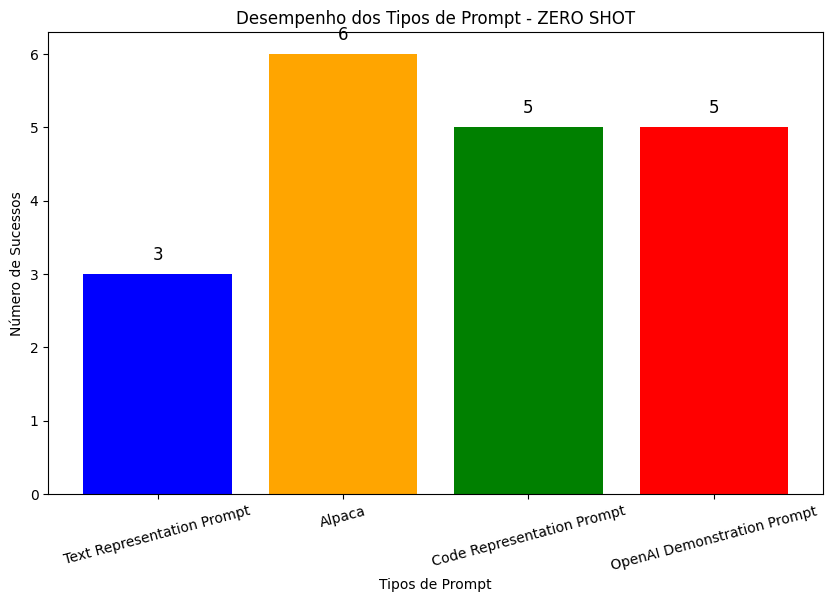

In [17]:
import matplotlib.pyplot as plt
categories = [
    "Text Representation Prompt",
    "Alpaca",
    "Code Representation Prompt",
    "OpenAI Demonstration Prompt"
]

results = [3, 6, 5, 5]  # Resultados baseados na contagem de consultas SQL geradas

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categories, results, color=['blue', 'orange', 'green', 'red'])

# Adicionando rótulos
plt.xlabel("Tipos de Prompt")
plt.ylabel("Número de Sucessos")
plt.title("Desempenho dos Tipos de Prompt - ZERO SHOT")

# Adicionando valores no topo das barras
for i, value in enumerate(results):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=12)

# Exibir gráfico
plt.xticks(rotation=15)
plt.show()

In [14]:
for query in Queries:
    for prompt in prompts_few_shot:
        response = generate_text(prompt.format(query), model_meta_llm_8, tokenizer_meta_llm_8, device)
        sql_query = extract_sql_query(response)
        print(f"NL Query: {query}\nSQL Query: {sql_query}\n", end="\n\n")

NL Query: What is the total number of prescriptions in the database?
SQL Query: SELECT drug, COUNT(*)


NL Query: What is the total number of prescriptions in the database?
SQL Query: SELECT count (*) FROM customers


NL Query: Which is the most common prescription in the database?
SQL Query: SELECT AVG(p.count)


NL Query: Which is the most common prescription in the database?
SQL Query: SELECT author FROM papers WHERE count(*) > 10


NL Query: Which professional has the most prescriptions in the database?
SQL Query: SELECT doctor_id, COUNT(*) as patient_count


NL Query: Which professional has the most prescriptions in the database?
SQL Query: SELECT 


NL Query: Which is the most common age in years for prescriptions in the database?
SQL Query: SELECT


NL Query: Which is the most common age in years for prescriptions in the database?
SQL Query: SELECT farm


NL Query: Show me the prescriptions for patients older than 50 years.
SQL Query: SELECT p.*, r.* FROM patients p JOIN prescri

Para o cenário de few-shot, não houve sucesso com a LLM escolhida. Em todos os casos houve alucinações, fazendo com que os resultados obtidos não representassem consultas SQL coerentes com o apresentado. Pode-se chegar à conclusão de que os exemplos tiraram o modelo da direção correta. Como próximos passos será necessário adequar melhor as amostras e fazer um ajuste mais rigoroso, coforme a geração.

## Conclusões
Com a análise dos resultados a partir dos diferentes tipos de prompt foi possível atestar que a tarefa de text-to-SQL se baseia no design da entrada, sendo sensível à maneira de construção do input e também ao modelo escolhido. Sendo assim, uma análise cautelosa desses dois aspectos, tal como a sua combinação é fundamental para a construção de um sistema robusto. Especialmente o cenário de few-shot deve ser analisado com cautela, devido a alucinações que ele pode provocar.

Isso posto, esse ainda é um campo com um vasto território para expansão e estudo. Os resultados podem ser continuamente aprimorados conforme modelos treinados em corpora maiores surgem e são aprimorados para a tarefa estudada.

In [ ]:
# connection.close()